In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



In [2]:
# Load the digits dataset
digits = load_digits()



In [3]:
# Convert to DataFrame for visualization
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()



,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
# Split data into train and test (80% train, 20% test)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# -----------------------------
# 1️⃣ Base SVM Model (RBF kernel)
# -----------------------------
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)
print("Accuracy with RBF kernel:", accuracy_score(y_test, y_pred_rbf))



Accuracy with RBF kernel: 0.9861111111111112


In [6]:
# -----------------------------
# 2️⃣ Linear Kernel
# -----------------------------
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print("Accuracy with Linear kernel:", accuracy_score(y_test, y_pred_linear))



Accuracy with Linear kernel: 0.9777777777777777


In [7]:
# -----------------------------
# 3️⃣ Tune Regularization Parameter (C)
# -----------------------------
model_C1 = SVC(C=1, kernel='rbf')
model_C1.fit(X_train, y_train)
print("Accuracy with C=1:", model_C1.score(X_test, y_test))



Accuracy with C=1: 0.9861111111111112


In [8]:
model_C10 = SVC(C=10, kernel='rbf')
model_C10.fit(X_train, y_train)
print("Accuracy with C=10:", model_C10.score(X_test, y_test))



Accuracy with C=10: 0.9861111111111112


In [9]:
# -----------------------------
# 4️⃣ Tune Gamma Parameter
# -----------------------------
model_gamma01 = SVC(gamma=0.1, kernel='rbf')
model_gamma01.fit(X_train, y_train)
print("Accuracy with gamma=0.1:", model_gamma01.score(X_test, y_test))



Accuracy with gamma=0.1: 0.07777777777777778


In [10]:
model_gamma1 = SVC(gamma=1, kernel='rbf')
model_gamma1.fit(X_train, y_train)
print("Accuracy with gamma=1:", model_gamma1.score(X_test, y_test))



Accuracy with gamma=1: 0.07777777777777778


In [11]:
# -----------------------------
# 5️⃣ Confusion Matrix (Best Model)
# -----------------------------
best_model = model_C10  # You can change this if another model performs better
y_pred_best = best_model.predict(X_test)



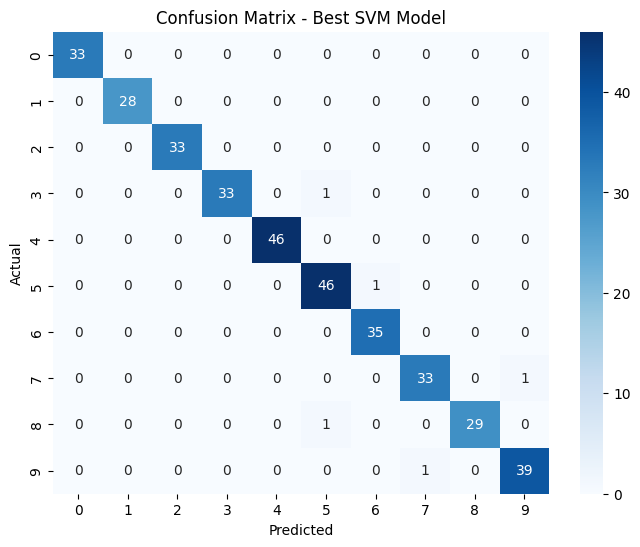

In [13]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Best SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
# Classification report
print("\nClassification Report for Best Model:\n")
print(classification_report(y_test, y_pred_best))


Classification Report for Best Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

